# Session 7
Simone Mistrali

ID:2119119 

In [51]:
options(repr.plot.width=8, repr.plot.height=5)

## Ex 1

A well established and diffused method for detecting a disease in blood fails to detect the presence
of disease in $15\%$ of the patients that actually have the disease.
A young UniPD startUp has developed an innovative method of screening. During the qualification
phase, a random sample of $n = 75$ patients known to have the disease is screened using the new
method.

### a)

What is the probability distribution of $y$, the number of times the new method fails to detect the
disease ?

We have a binomial distribution, because we have a true/false situation.

### b)

On the $n = 75$ patients sample, the new method fails to detect the disease in $y = 6$ cases. What is
the frequentist estimator of the failure probability of the new method ?


The frequentist estimator of the new method is $\hat{p}=\dfrac{y}{n}=0.08$.

### c)

Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean
value $0.15$ and standard deviation $0.14$. Plot the posterior distribution for y, and mark on the plot
the mean value and variance


As we have seen in the **session 5** we can use this substitution to link $\mu$ and $\sigma$ to $\alpha$ and $\beta$:


$$
\begin{cases}
\nu = \alpha^* + \beta^*=\dfrac{\mu(1-\mu)}{\sigma^2}-1\\
\alpha^* = \mu \nu =\mu\left( \dfrac{\mu(1-\mu)}{\sigma^2}-1\right)\\
\beta^*  = \left(1-\mu \right)\nu =\left(1-\mu \right)\left( \dfrac{\mu(1-\mu)}{\sigma^2}-1\right)
\end{cases}
$$



In [52]:
mu <- 0.15
sigma <- 0.14
nu <- mu*(1-mu)/sigma^2 -1
alpha <- nu*mu
beta <- (1-mu)*nu
n <- 75 
y <- 6

n.sample <- 10000


dp <- (0.4-1/(2*n.sample))/n.sample

p <- seq(from=1/(2*n.sample), by=1/n.sample, to= 0.4)

p.likelihood <- dbinom(x=y, size=n, prob=p)
prior <-dbeta(p,shape1=alpha,shape2=beta)
posterior <- prior*p.likelihood
posterior.n <- posterior/(sum(posterior)*dp)

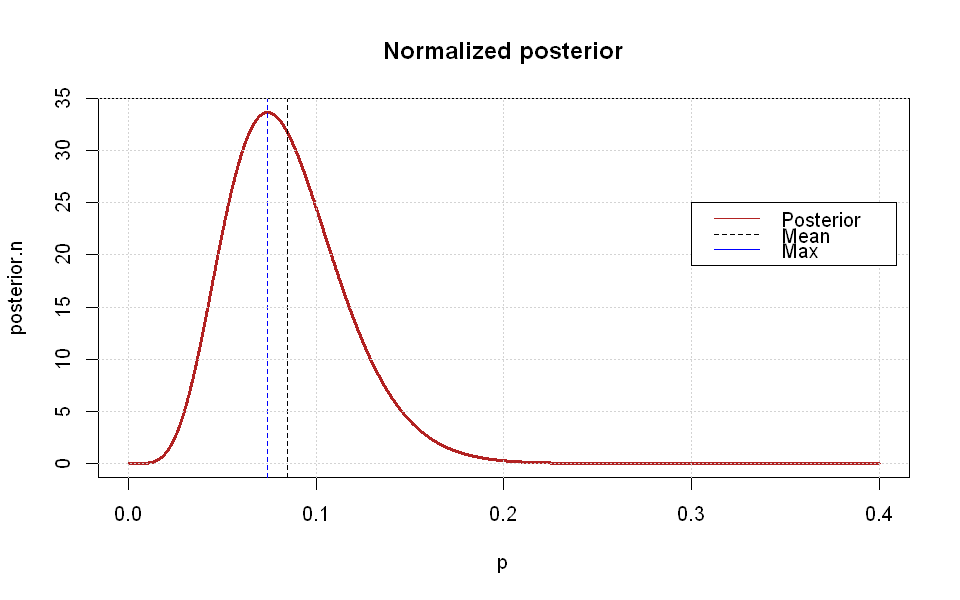

In [53]:
plot(p,posterior.n,type="l",lwd = 3,col="firebrick",main="Normalized posterior")
p.mean <- dp*sum(p*posterior.n)
abline(v=p.mean, lty=2,col='black')
i <- c(which(posterior.n==max(posterior.n), arr.ind=TRUE))
max.p <- p[i]

abline(v=p.mean, lty=2,col='black')
abline(v=max.p, lty=2,col='blue')
grid()
legend(0.30, 25, legend=c("Posterior", "Mean","Max"),
       col=c("firebrick", "black","blue"), lty=1:2)


### d)
Perform a test of hypothesis assuming that if the probability of failing to the detect the desease
in ill patients is greater or equal than $15\%$, the new test is no better that the traditional method.
Test the sample at a $5\%$ level of significance in the Bayesian way.

In this case we have to integrate from $\infty$ to $0.15$ the posterior probability, we reject the null hypothesist if the area is less than $\alpha=5\%$.

$$
\mathcal{P}\left(H_0:p\leq p_0\, |\,y \right)=\int_{p_0}^\infty g(p\,|\,y)\,dp
$$

In [54]:
# find 0.15
i <- c(which(p==0.15005, arr.ind=TRUE))
print(paste0("The integral of the posterior from infinity to 0.15 is ",sum(posterior.n[i:length(posterior.n)])*dp,"."))
print(("Is less than 0.05, so we can reject the null hypotesis"))

[1] "The integral of the posterior from infinity to 0.15 is 0.031279298447056."
[1] "Is less than 0.05, so we can reject the null hypotesis"


### Frequentist approach

In [55]:
print(paste0("The integral of the posterior from infinity to 0.15 is ",sum(dbinom(0:5,75,0.15)),"."))
print(("Is less than 0.05, so we can reject the null hypotesis"))

[1] "The integral of the posterior from infinity to 0.15 is 0.0234200455853143."
[1] "Is less than 0.05, so we can reject the null hypotesis"


### Ex 2

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.

Considering the following to sets of observations taken over a fixed large time interval in two different
corps:

| y death soldiers | 0 | 1 | 2 | 3 | 4 | ≥ 5|
--|--|--|--|--|--|--
| n1 observations | 109 | 65 | 22 | 3 | 1 | 0|
| n2 observations | 144 | 91 | 32 | 11 | 2 | 0|


Assuming a uniform prior, compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the $95\%$ credibility interval.

The $Gamma(\alpha',\lambda')$ distribution in this case is the posterior of the poisson distibution using uiform prior using:
$$
\begin{cases}
\alpha'=\sum x_j +1 \\
\lambda'=n
\end{cases}
$$
where $\{x_j\}_{j=1:n}$ is the set of measurement.

Sorry professor, i don't understad if the exercise asks to study $n1$ and $n2$ distinctly or as a unique process in the first case we have to set up the same study, so compute the $\alpha$s and compute the mean, variance and the median separatly, in the second case we have to sum the two sets of observations and do this analysis only one time (i'll do the last case). 

In [56]:
n1 <- c(109,65,22,3,1,0)
n2 <- c(144,91,32,11,2,0)
mu <- seq(0,60,by=0.001)
N <- 6
n <- length(mu)
dm <- 1/n
# two set of measurements two times N
lambda <- N*2
alpha <- sum(n1)+sum(n2)+1
alphaj <- sum(n1)+sum(n2)+0.5

### Uniform Prior

In [57]:
# To compute the median we have to compute the area and stop where it is 0.5
median <- function(posterior,mu){
    area <- 0
    Z <-sum(posterior)
    for(i in 1:length(mu)){
        area<- area + posterior[i]/Z
        if(area>=0.5)
            break
    }
    return(mu[i])
}
CI <- function(posterior,mu,alpha){
    area <- 0
    Z <-sum(posterior)
    for(i in 1:length(mu)){
        area<- area + posterior[i]/Z
        if(area>=alpha/2)
            break
    }
    area <-0
    for(j in seq(length(mu),1,by=-1)){
        area<- area + posterior[j]/Z
        if(area>=alpha/2)
            break
    }
    return(c(mu[i],mu[j]))
}

[1] "The numerical mean is 40.0833333333333 the theoretical one is 40.0833333333333."
[1] "The numerical variance is 3.03999078481749 the theoretical one is 3.34027777777778."
[1] "The median of the posterior is 40.056."


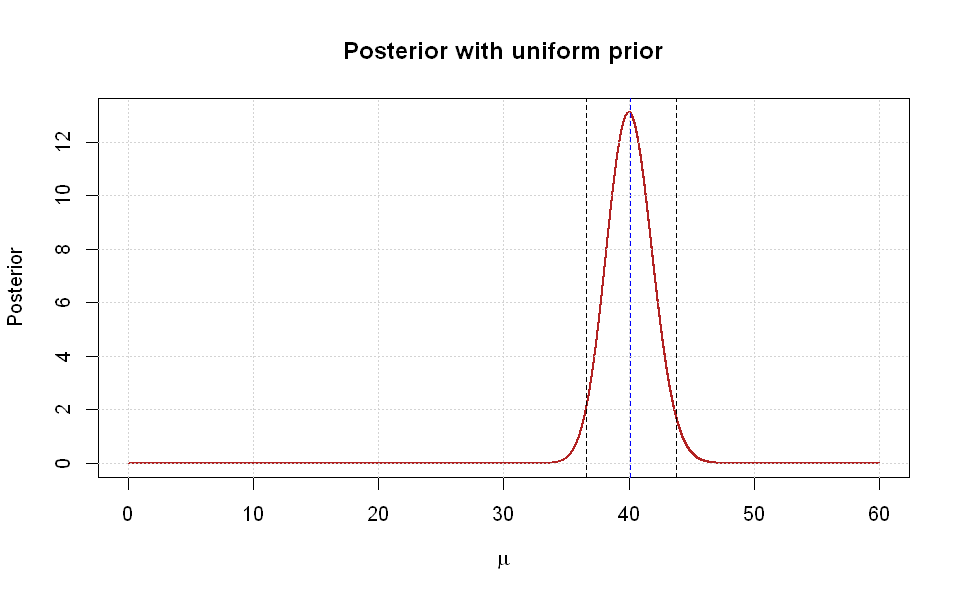

In [58]:
posterior <- dgamma(x = mu, shape = alpha, rate = lambda)/(sum(dgamma(x = mu, shape = alpha, rate = lambda))*dm) 
p.mean <- dm*sum(mu*posterior)
d<-CI(posterior =posterior,mu=mu,alpha=0.05 )
plot(mu, posterior, type="l", col="firebrick",lwd=2,lty=1, 
     ylab="Posterior", xlab= expression(mu) , xlim=c(0,60),main="Posterior with uniform prior")
abline(v=p.mean,col="blue",lty=2)
grid()
abline(v=d[1],lty=2)
abline(v=d[2],lty=2)
p.var <- sqrt((sum(posterior^2)-p.mean^2)/n)
print(paste0("The numerical mean is ", p.mean," the theoretical one is ", alpha/lambda,"."))
print(paste0("The numerical variance is ",p.var ," the theoretical one is ", alpha/lambda^2,"."))
print(paste0("The median of the posterior is ",median(posterior,mu),"."))


[1] "The numerical mean is 40.0416666666667 the theoretical one is 40.0416666666667."
[1] "The numerical variance is 3.04079399505943 the theoretical one is 3.33680555555556."
[1] "The median of the posterior is 40.014."


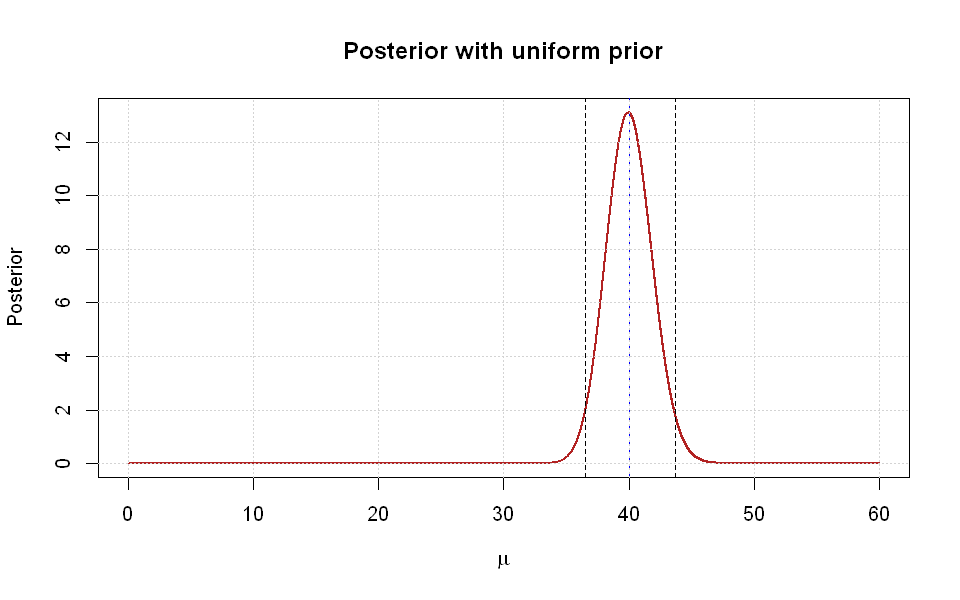

In [59]:
posterior <- dgamma(x = mu, shape = alphaj, rate = lambda)/(sum(dgamma(x = mu, shape = alphaj, rate = lambda))*dm) 
p.mean <- dm*sum(mu*posterior)
d<-CI(posterior =posterior,mu=mu,alpha=0.05 )
plot(mu, posterior, type="l", col="firebrick",lwd=2,lty=1, 
     ylab="Posterior", xlab= expression(mu) , xlim=c(0,60),main="Posterior with uniform prior")
abline(v=p.mean,col="blue",lty=2)
grid()
abline(v=d[1],lty=2)
abline(v=d[2],lty=2)
p.var <- sqrt((sum(posterior^2)-p.mean^2)/n)
print(paste0("The numerical mean is ", p.mean," the theoretical one is ", alphaj/lambda,"."))
print(paste0("The numerical variance is ",p.var ," the theoretical one is ", alphaj/lambda^2,"."))
print(paste0("The median of the posterior is ",median(posterior,mu),"."))


## Ex 3

A study on water quality of streams, a high level of bacter X was defined as a level greater than $100$
per $100\, ml$ of stream water. $n = 116$ samples were taken from streams having a high environmental
impact on pandas. Out of these, $y = 11$ had a high bacter X level.

Indicating with $p$ the probability that a sample of water taken from the stream has a high bacter
X level:
1. Find the frequentist estimator for $p$.
2. Using a $Beta(1, 10)$ prior for $p$, calculate and posterior distribution $\mathcal{P} (p\,|\,y)$.
3. Find the bayesian estimator for $p$, the posterior mean and variance, and a $95\%$ credible interval.
4. Test the hypotesis: $H_0$ : $p = 0.1$ versus $H_1$ : $p \neq 0.1$ at $5\%$ level of significance with both the frequentist and bayesian approach.


A new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter X level:

5.  Find the frequentist estimator for $p$.
6.  Find a bayesian estimator for $p$, assuming both a $Beta(1, 10)$ prior for $p$, and assuming the posterior probability of the older measurement as the prior for the new one.
7.  Find the bayesian estimator for $p$, the posterior mean and variance, and a $95\%$ credible interval
8. test the hypotesis $H_0$ : $p = 0.1$ versus $H_1$ : $p \neq 0.1$ at $5\%$ level of significance with both the frequentist and bayesian approach.




### 1) 
Find the frequentist estimator for  $p$:

The best frequentist estimator for $p$ is the binomial one: $\hat{p}=\dfrac{y}{n}=0.095$  

### 2)
Using a $Beta(1, 10)$ prior for $p$, calculate and posterior distribution $\mathcal{P} (p\,|\,y)$.

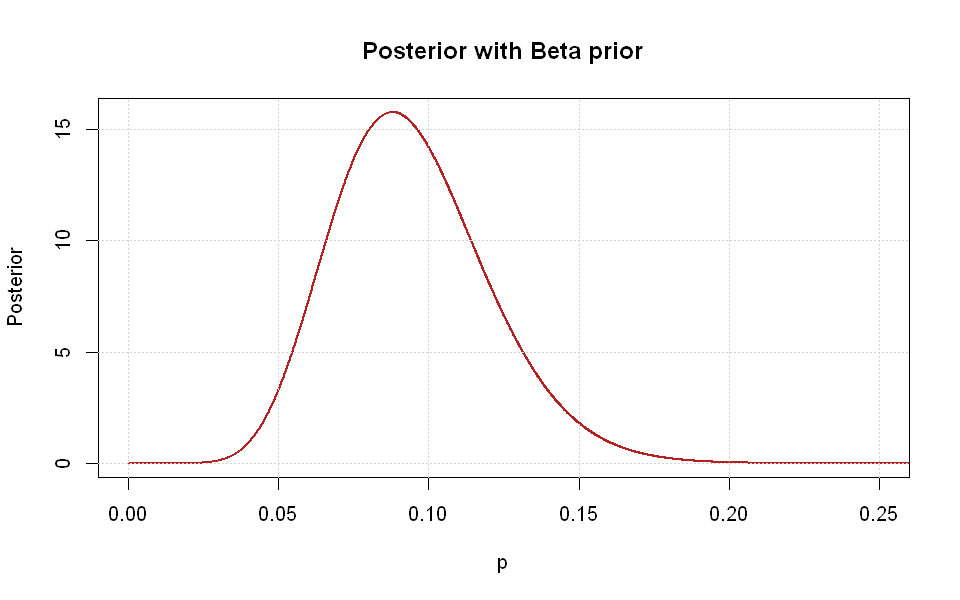

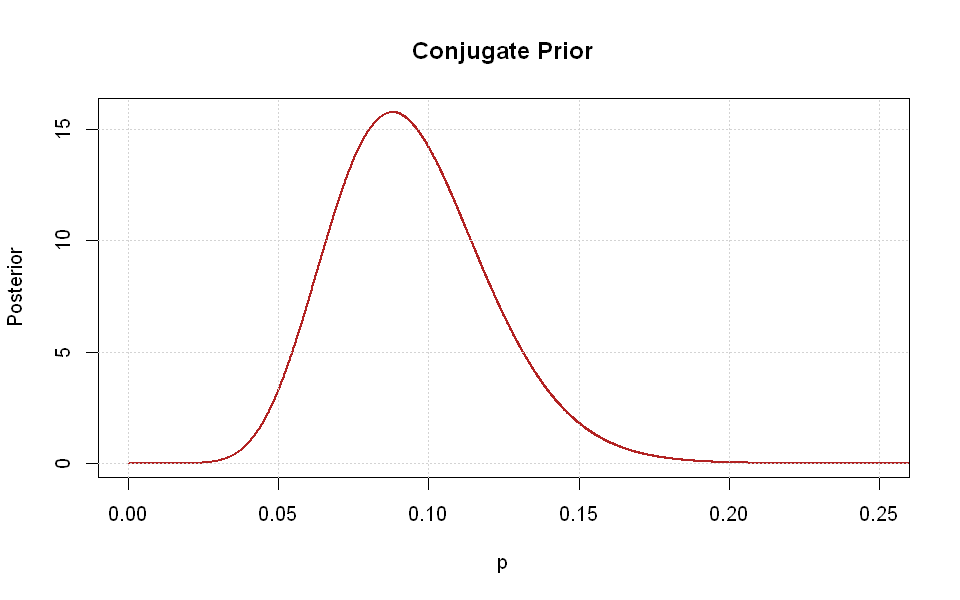

In [60]:
y <- 11
n <- 116
n.samples <- 10000
dp <- 1/n.samples
p <- seq(from=1/n.samples,by=dp,length.out = n.samples)
# "Brute force approach"
prior <- dbeta(p,1,10)
posterior <- prior*dbinom(x = y,size = n,prob = p)
posterior.n <-posterior/(sum(posterior)*dp)

plot(p,posterior.n,type = 'l',col = "firebrick",lwd=2,lty=1,ylab="Posterior",xlab="p",xlim=c(0.0,0.25),main="Posterior with Beta prior")
grid()
# Using the conjugate prior
alpha_old <- 1 + y
beta_old <- 10 + n - y
posterior <- dbeta(p, alpha_old, beta_old)

plot(p,posterior,type = 'l',col = "firebrick",lwd=2,lty=1,ylab="Posterior",xlab="p",xlim=c(0.0,0.25),main="Conjugate Prior")
grid()


### 3)

Find the bayesian estimator for $p$, the posterior mean and variance, and a $95\%$ credible interval.


In [61]:
p.mean <- dp*sum(posterior*p)
x <- CI(posterior,p,0.05)
p.var1 <- sqrt((sum((posterior^2/sum(posterior)))-p.mean^2)/n.samples)
print(paste0("The bayesian estimator is: ",p[which.max(posterior)],"."))
print(paste0("The mean is: ",p.mean,"."))
print(paste0("The variance is: ",p.var1,"."))
print(paste0("The confidence interval is [",x[1],",",x[2],"]."))

[1] "The bayesian estimator is: 0.088."
[1] "The mean is: 0.094488188976378."
[1] "The variance is: 0.0333608819518268."
[1] "The confidence interval is [0.0502,0.1508]."


### 4)
Test the hypotesis: $H_0$ : $p = 0.1$ versus $H_1$ : $p \neq 0.1$ at $5\%$ level of significance with both the frequentist and bayesian approach.

In the frequentist approach we do the test on a binomial with $p=0.1$, if the found number of successes is inside a 95% probability interval then the null hypothesis can't be rejected.

In [62]:
print(paste0("The cumulative probability between the interval 4 and 17 is ",1-(pbinom(4,116,0.1)+ pbinom(17,116,0.1, lower.tail = FALSE))))
print(paste0("11 is inside this interval so we can not reject the null hypotesis"))

[1] "The cumulative probability between the interval 4 and 17 is 0.952389915114082"
[1] "11 is inside this interval so we can not reject the null hypotesis"


In [63]:
print(paste0("In the bayesian approach we can simply look at the CI and in our case we see that 0.1 stays between [",x[1],",",x[2],"]."))

[1] "In the bayesian approach we can simply look at the CI and in our case we see that 0.1 stays between [0.0502,0.1508]."


A new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter X level.


In [64]:
y <- 9
n <- 165

### 5) 
Find the frequentist estimator for $p$.

In [65]:
print(paste0("The frequentist estimator is: ",y/n,"."))

[1] "The frequentist estimator is: 0.0545454545454545."


### 6,7,8)  
Find a bayesian estimator for $p$, assuming both a $Beta(1, 10)$ prior for $p$, and assuming the posterior probability of the older measurement as the prior for the new one.

Find the bayesian estimator for $p$, the posterior mean and variance, and a $95\%$ credible interval.

Test the hypotesis $H_0$ : $p = 0.1$ versus $H_1$ : $p \neq 0.1$ at $5\%$ level of significance with both the frequentist and bayesian approach.

[1] "The bayesian estimator is: 0.0517."
[1] "The mean is: 0.0568181818181818."
[1] "The variance is: 0.0408769721238771."
[1] "The confidence interval is [0.0277,0.0954]."
[1] "The cumulative probability between the interval 1 and 23 is 0.960071201991359"
[1] "9 is inside this interval so we can not reject the null hypotesis"
[1] "In the bayesian approach we can simply look at the CI and in our case we see that 0.1 stays between [0.0277,0.0954]."


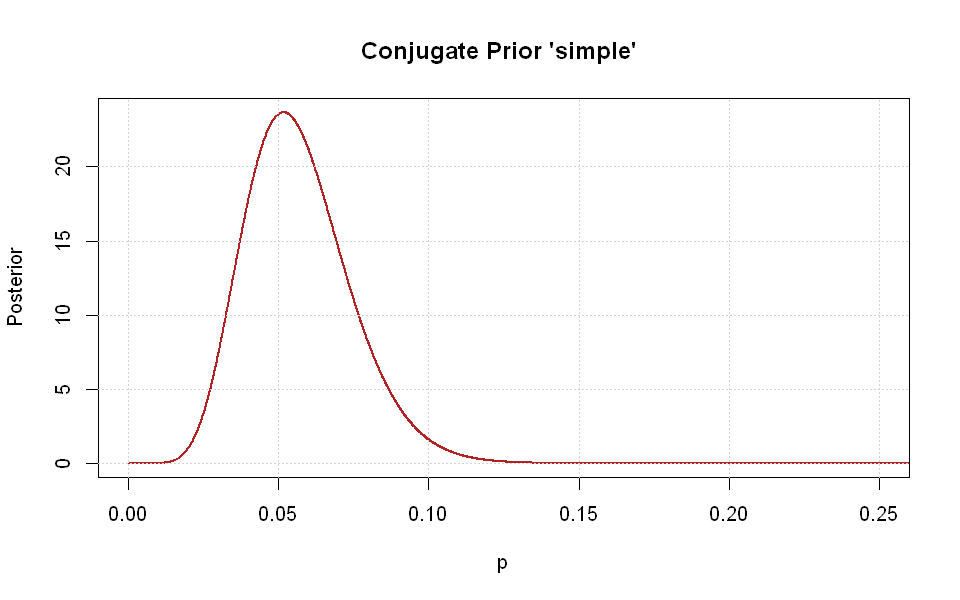

In [66]:
# Beta(1,10)
alpha <- 1 + y
beta <- 10 + n - y
posterior <- dbeta(p, alpha, beta)

plot(p,posterior,type = 'l',col = "firebrick",lwd=2,lty=1,ylab="Posterior",xlab="p",xlim=c(0.0,0.25),main="Conjugate Prior 'simple' ")
grid()
p.mean <- dp*sum(posterior*p)
x <- CI(posterior,p,0.05)
p.var1 <- sqrt((sum((posterior^2/sum(posterior)))-p.mean^2)/n.samples)
print(paste0("The bayesian estimator is: ",p[which.max(posterior)],"."))
print(paste0("The mean is: ",p.mean,"."))
print(paste0("The variance is: ",p.var1,"."))
print(paste0("The confidence interval is [",x[1],",",x[2],"]."))
print(paste0("The cumulative probability between the interval 1 and 23 is ",1-(pbinom(1,165,0.1)+ pbinom(23,165,0.1, lower.tail = FALSE))))
print(paste0("9 is inside this interval so we can not reject the null hypotesis"))
print(paste0("In the bayesian approach we can simply look at the CI and in our case we see that 0.1 stays between [",x[1],",",x[2],"]."))

Old posterior as a new prior.

[1] "The bayesian estimator is: 0.069."
[1] "The mean is: 0.0719178082191781."
[1] "The variance is: 0.0435106163378397."
[1] "The confidence interval is [0.0452,0.1042]."
[1] "The cumulative probability between the interval 1 and 23 is 0.960071201991359"
[1] "9 is inside this interval so we can not reject the null hypotesis"
[1] "In the bayesian approach we can simply look at the CI and in our case we see that 0.1 stays between [0.0452,0.1042]."


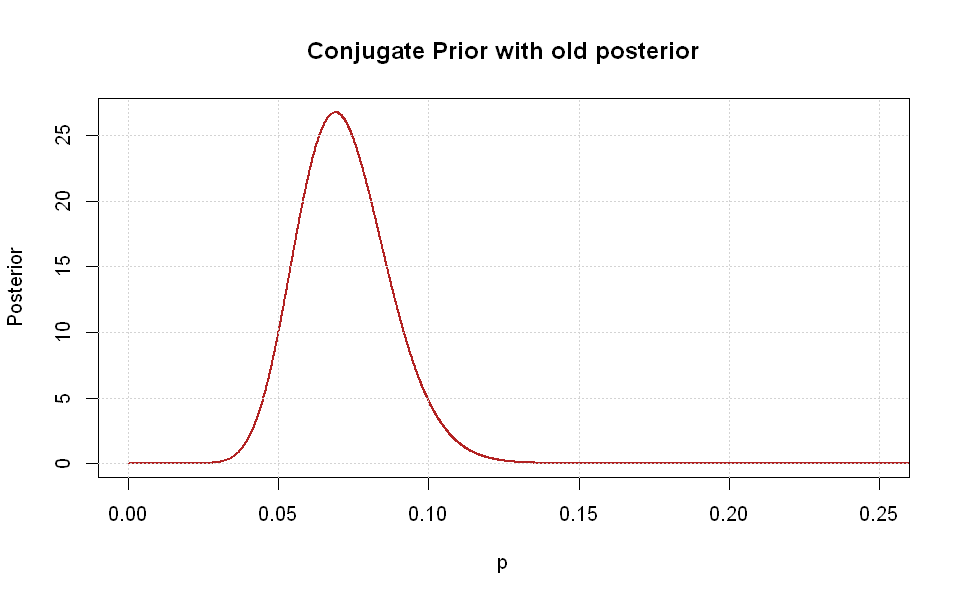

In [67]:
# In this case we can use directly the old posterior, or we can use again the conjugate prior (the posterior is a Beta(12,115))
alpha <- alpha_old + y
beta <- beta_old + n-y
posterior <- dbeta(p, alpha, beta)
posterior.n <- posterior
plot(p,posterior.n,type = 'l',col = "firebrick",lwd=2,lty=1,ylab="Posterior",xlab="p",xlim=c(0.0,0.25),main="Conjugate Prior with old posterior")
grid()
p.mean <- dp*sum(posterior.n*p)
x <- CI(posterior,p,0.05)
p.var1 <- sqrt((sum((posterior.n^2/sum(posterior.n)))-p.mean^2)/n.samples)
print(paste0("The bayesian estimator is: ",p[which.max(posterior.n)],"."))
print(paste0("The mean is: ",p.mean,"."))
print(paste0("The variance is: ",p.var1,"."))
print(paste0("The confidence interval is [",x[1],",",x[2],"]."))
print(paste0("The cumulative probability between the interval 1 and 23 is ",1-(pbinom(1,165,0.1)+ pbinom(23,165,0.1, lower.tail = FALSE))))
print(paste0("9 is inside this interval so we can not reject the null hypotesis"))
print(paste0("In the bayesian approach we can simply look at the CI and in our case we see that 0.1 stays between [",x[1],",",x[2],"]."))